### Project Background

#### Introduction of the Project
MetroMove Transit Solutions is a public transportation service provider operating in multiple cities. 
They manage and analyze thousands of daily trips taken via buses, trains, ferries, and trams. 
The company's mission is to provide efficient, affordable, and timely public transportation services while leveraging data to improve passenger experience and optimize operations.


<center>
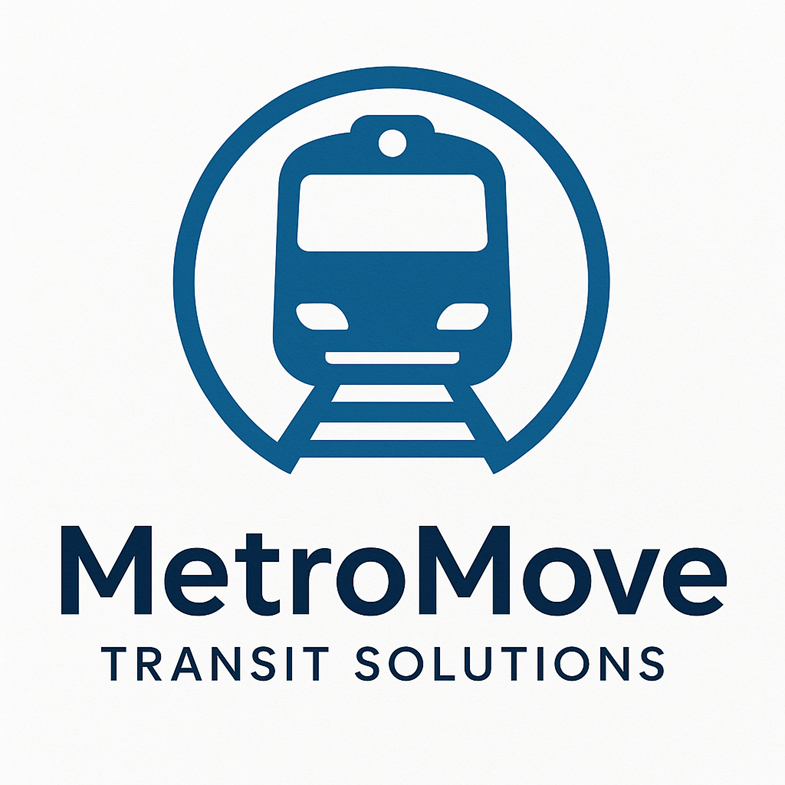
</center>

#### Problem Statement
MetroMove has collected a large volume of trip data but lacks insights into trip performance, passenger behavior, and fare patterns due to messy, inconsistent, and incomplete records. As part of their new data-driven initiative, they want to clean, explore, and summarize their trip records to identify inefficiencies and patterns that can drive operational improvements.

#### Scope of this project
Effective decision-making relies on:
- Understanding passenger usage patterns.
- Evaluating the performance of different transport modes.
- Analyzing how trip characteristics impact customer experience.

#### How to achieve the goals of this project
By Data Cleaning and Explorations, descriptive statistics, Univariate/Bivariate/Multivariate Analysis 
and by data viualization

This project provides a real-world simulation by:
- Requiring cleaning and preprocessing of raw data.
- Encouraging pattern discovery through exploratory data analysis.
- Developing skills in communicating data-driven insights.
- Working within the context of a transportation-focused dataset.

In [63]:
# first, install the missing package
!pip install missingno

In [64]:
# Then, importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

In [65]:
# reading the file
df = pd.read_excel(r"C:\Users\fanta\OneDrive\10Alytics\EDA\Public_Transport_Trips_EDA.xlsx")  

In [66]:
# identifying the head
df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday


In [67]:
# identifying the tail
df.tail()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday
997,TRIP0998,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday
999,TRIP1000,train,Airport,West End,2024-01-01 22:39:00,34.0,8.168803,21.0,2024-02-11,Tuesday


In [68]:
# Information of the data is a requirement for checking data distribution and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        900 non-null    float64       
 6   Fare_Amount            900 non-null    float64       
 7   Trip_Duration_Minutes  900 non-null    float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 78.3+ KB


In [69]:
# I will check for the features in this data
df.columns

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week'],
      dtype='object')

Data indicates that we have 100 missing values on each of the numerical data which is large. In that case I will not drop it, instead i will fill them. Below is a table of the issues i will identify and the suggested cleaning suggestions

| Column Name                 | Issues Identified                                           | Cleaning Suggestions                                          |
| --------------------------- | ----------------------------------------------------------- | ------------------------------------------------------------- |
| **Trip\_ID**                | Unique identifier (no issues)                               | Ensure no duplicates                                          |
| **Mode\_of\_Transport**     | Inconsistencies in transport types (e.g., spelling, casing) | Normalize values (e.g., standardize to "Bus", "Train", etc.)  |
| **Departure\_Station**      | Whitespace errors                                           | Strip leading/trailing/multiple spaces                        |
| **Arrival\_Station**        | Inconsistent casing                                         | Convert to consistent casing (e.g., title case or upper case) |
| **Departure\_Time**         | Should be a datetime format                                 | Convert to datetime, check for invalid/missing values         |
| **Passenger\_Count**        | Missing values                                              | Handle missing: impute, fill, or drop depending on context    |
| **Fare\_Amount**            | Missing values                                              | Handle missing or outliers, ensure correct numeric format     |
| **Trip\_Duration\_Minutes** | Missing values                                              | Check for logical values, handle missing or zero durations    |
| **Trip\_Date**              | Should be a date format                                     | Convert to datetime if needed                                 |
| **Day\_of\_Week**           | Should match the trip date                                  | Recalculate from `Trip_Date` to ensure accuracy               |


#### Categorical description

In [70]:
# Highlighting the statistical description (Categorical)
df.describe(include=["object","bool"])

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Day_of_Week
count,1000,1000,1000,1000,1000
unique,1000,9,7,7,7
top,TRIP0001,Bus,North Station,South Point,Sunday
freq,1,147,171,171,167


In [71]:
# From this the Top mode of Transport is Bus,
# Top derparture station and arrival station are North Station and south Point respectively and 
# top for days of the week is Sunday
# From this we can see that there are 9 unique modes of transportation whilst by Metro gave us 4 unique transport modes. 

In [72]:
# checking for inconsistencies in the categorical 
df["Mode_of_Transport"].unique()

array(['FERRY', 'Tram', 'bus', 'Ferry', 'fErry', 'Train', 'train', 'BUS',
       'Bus'], dtype=object)

In [73]:
# Stripping whitespace
# Converting to lowercase
# Matching the cleaned value
# Replacing it with the standardized version

In [74]:
# Correct spelling error in ferry, Bus and train.
# no need to correct Tram

In [75]:
transport_map = { "ferry": "Ferry", "bus": "Bus", "train": "Train", "tram": "Tram"}

# Apply cleaning + mapping
df["Mode_of_Transport"] = df["Mode_of_Transport"].str.strip().str.lower().map(transport_map)

In [76]:
# Checking if it has been changed
df["Mode_of_Transport"].unique()

array(['Ferry', 'Tram', 'Bus', 'Train'], dtype=object)

In [77]:
df["Arrival_Station"].unique()

array(['airport', 'Downtown', 'North Station', 'Central', 'South Point',
       'West End', 'Airport'], dtype=object)

In [78]:
# Strip whitespace and standardize casing
cleaned_stations = df["Arrival_Station"].str.strip().str.title()

# Replace the original column if needed
df["Arrival_Station"] = cleaned_stations

# Get unique cleaned values
unique_stations = df["Arrival_Station"].unique()
print(unique_stations)


['Airport' 'Downtown' 'North Station' 'Central' 'South Point' 'West End']


In [79]:
df["Departure_Station"].unique()

array(['West End', 'North Station', 'Central', 'Downtown', 'South Point',
       ' Central ', 'Airport'], dtype=object)

In [80]:
# Strip whitespace and standardize casing
cleaned_stations = df["Departure_Station"].str.strip().str.title()

# Replace the original column if needed
df["Departure_Station"] = cleaned_stations

# Get unique cleaned values
unique_stations = df["Departure_Station"].unique()
print(unique_stations)


['West End' 'North Station' 'Central' 'Downtown' 'South Point' 'Airport']


In [81]:
# Checking if there are any inconsistencies
df["Day_of_Week"].unique()

array(['Sunday', 'Saturday', 'Tuesday', 'Monday', 'Thursday', 'Wednesday',
       'Friday'], dtype=object)

In [82]:
# Day of the week is okay

In [83]:
# Cross checking the statistical description (Categorical)
df.describe(include=["object","bool"])

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Day_of_Week
count,1000,1000,1000,1000,1000
unique,1000,4,6,6,7
top,TRIP0001,Bus,Central,Airport,Sunday
freq,1,332,208,213,167


After cleaning the categorical data 
- From this the Top mode of Transport is Bus,
- Top derparture station and arrival station are Central and Airport respectively and 
- top for days of the week is still Sunday
- From this we can see that there are 4 unique modes of transportation. 

#### Numerical description

In [84]:
# Highlighting the statistical description (numerical)
df.describe()

,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date
count,1000,900.000000,900.000000,900.000000,1000
mean,2024-01-01 14:19:30,49.154444,25.360742,94.270000,2024-01-21 08:03:50.400000
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00
25%,2024-01-01 10:09:45,25.000000,12.818196,49.750000,2024-01-11 00:00:00
50%,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00
75%,2024-01-01 18:29:15,72.000000,37.866623,138.000000,2024-02-01 00:00:00
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00
std,NaN,27.698270,14.464556,50.634982,NaN


##### Changing Departure_Time and Trip_Date to the right format

In [85]:
# Changing Departure_Time and Trip_Date to the right format
df["Departure_Time"]=pd.to_datetime(df["Departure_Time"])
df["Trip_Date"]=pd.to_datetime(df["Trip_Date"])

In [86]:
# checking to see if the date time has been coverted. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        900 non-null    float64       
 6   Fare_Amount            900 non-null    float64       
 7   Trip_Duration_Minutes  900 non-null    float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 78.3+ KB


In [87]:
# Highlighting the statistical description (Categorical)
df.describe()

,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date
count,1000,900.000000,900.000000,900.000000,1000
mean,2024-01-01 14:19:30,49.154444,25.360742,94.270000,2024-01-21 08:03:50.400000
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00
25%,2024-01-01 10:09:45,25.000000,12.818196,49.750000,2024-01-11 00:00:00
50%,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00
75%,2024-01-01 18:29:15,72.000000,37.866623,138.000000,2024-02-01 00:00:00
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00
std,NaN,27.698270,14.464556,50.634982,NaN


#### Exploring for missing values in the data set

In [88]:
# checking for missing Values in the data set
df.isnull().mean()*100

Trip_ID                   0.0
Mode_of_Transport         0.0
Departure_Station         0.0
Arrival_Station           0.0
Departure_Time            0.0
Passenger_Count          10.0
Fare_Amount              10.0
Trip_Duration_Minutes    10.0
Trip_Date                 0.0
Day_of_Week               0.0
dtype: float64

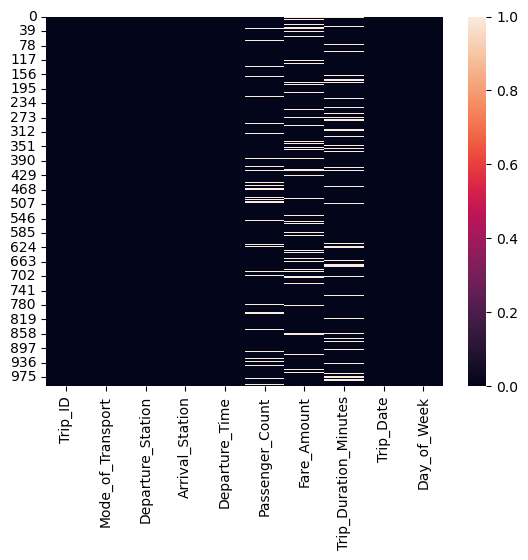

In [89]:
# visualizing the missing value accross the data
sns.heatmap(df.isnull());

In [90]:
# It shows a lot of missing values
# Checking out for the percentage of missing values in the data set


In [91]:
# Replacing the missing values with the median
df.isnull().any(axis=1).mean()*100

26.700000000000003

In [92]:
#26.7% is too much to be dropped. hence, i will replace all numerical values with the median

In [93]:
df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday


In [94]:
# using median to replace the missing values
df["Passenger_Count"]=df["Passenger_Count"].fillna(df["Passenger_Count"].median())
df["Fare_Amount"]=df["Fare_Amount"].fillna(df["Fare_Amount"].median())
df["Trip_Duration_Minutes"]=df["Trip_Duration_Minutes"].fillna(df["Trip_Duration_Minutes"].median())

#### Confirming if there are still missing values 

In [95]:
# checking if the median has been replaced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        1000 non-null   float64       
 6   Fare_Amount            1000 non-null   float64       
 7   Trip_Duration_Minutes  1000 non-null   float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 78.3+ KB


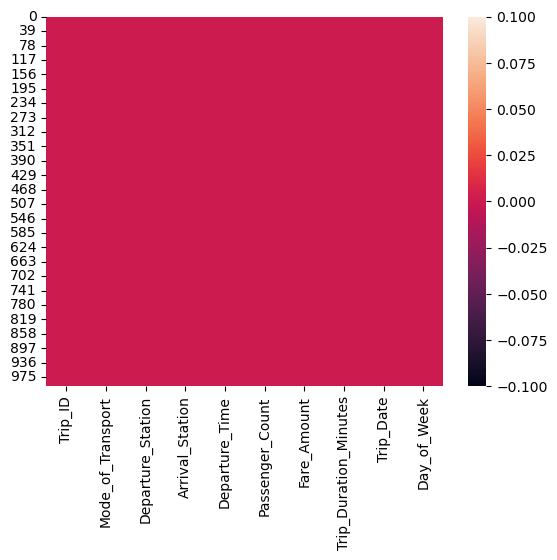

In [96]:
# confirming the missing value accross the data
sns.heatmap(df.isnull());

In [97]:
# Decribing the data
df.describe()

,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date
count,1000,1000.000000,1000.000000,1000.000000,1000
mean,2024-01-01 14:19:30,49.039000,25.365053,94.593000,2024-01-21 08:03:50.400000
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00
25%,2024-01-01 10:09:45,28.000000,13.917364,55.000000,2024-01-11 00:00:00
50%,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00
75%,2024-01-01 18:29:15,70.000000,36.580122,132.250000,2024-02-01 00:00:00
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00
std,NaN,26.277709,13.721526,48.043673,NaN


In [98]:
# Even though it was filled by the median. the mean did not shift much. 
# Observed that it was a good idea for filling the data


ALL CATEGORICAL AND NUMERICAL DATA ARE CLEAN

#### Creating a new feature "Total_Amount"

In [99]:
df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday


In [100]:
df["Total_Amount"]=df["Passenger_Count"]*df["Fare_Amount"]

In [101]:
df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Total_Amount
0,TRIP0001,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,91.216483
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,950.975482


#### Univariate Analysis

In [102]:
df.columns

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week', 'Total_Amount'],
      dtype='object')

Working on the categorical analysis first

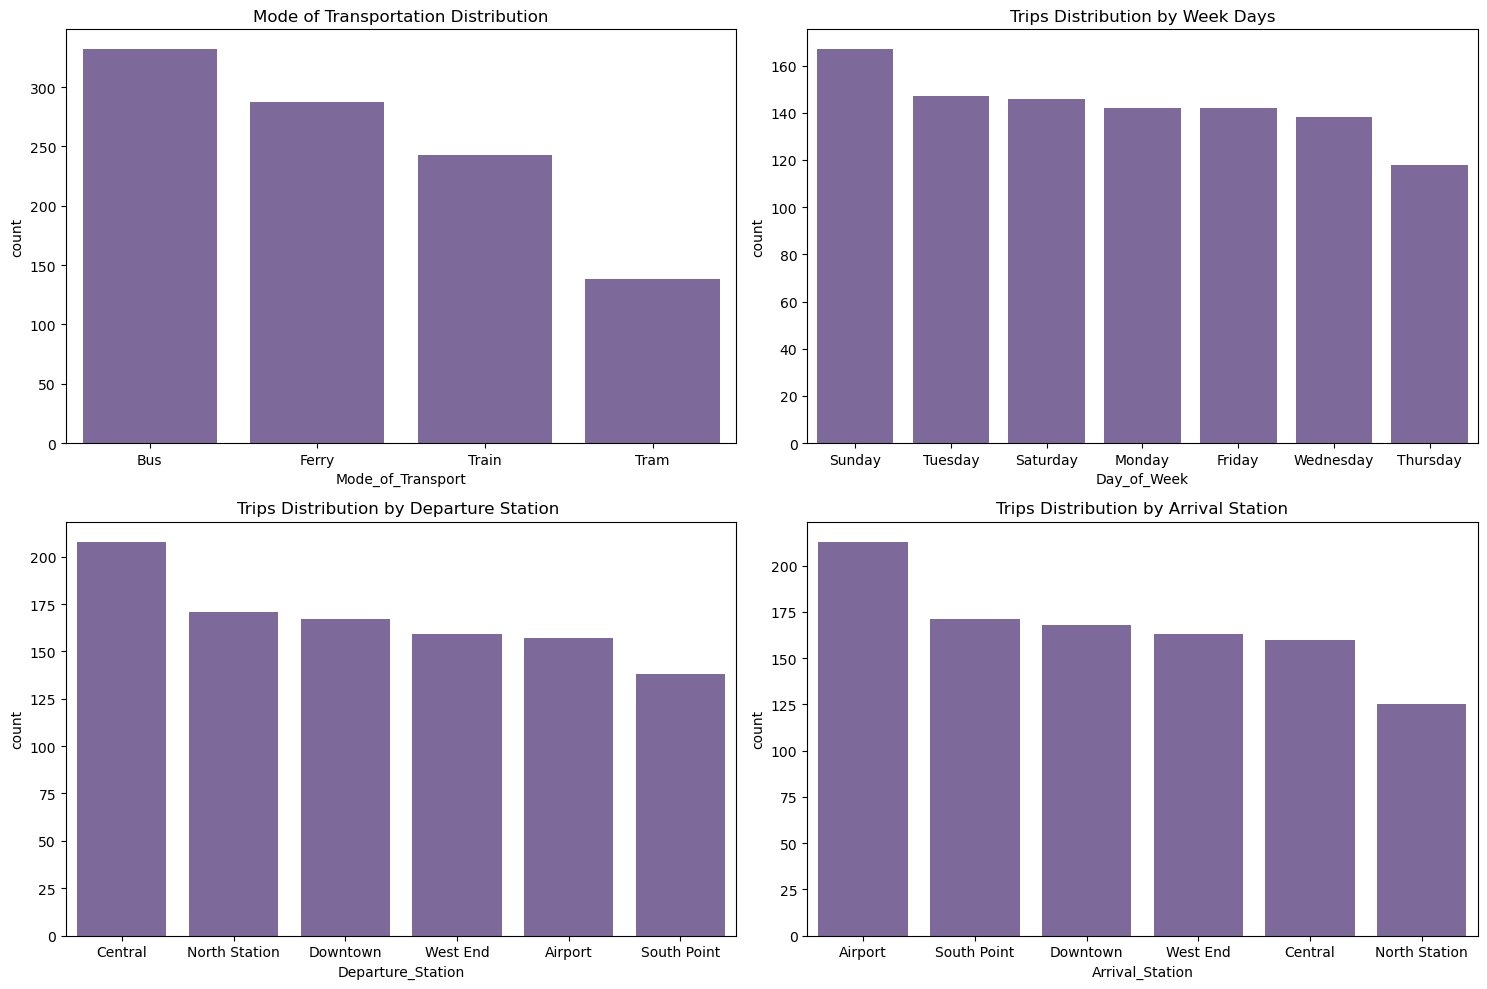

In [103]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax = ax.flatten()

sns.countplot(x=df["Mode_of_Transport"], ax=ax[0], order=df["Mode_of_Transport"].value_counts().index, color="#7c62a2")
ax[0].set_title("Mode of Transportation Distribution")

sns.countplot(x=df["Day_of_Week"], ax=ax[1], order=df["Day_of_Week"].value_counts(ascending=False).index, color="#7c62a2")
ax[1].set_title("Trips Distribution by Week Days")

sns.countplot(x=df["Departure_Station"], ax=ax[2], order=df["Departure_Station"].value_counts().index, color="#7c62a2")
ax[2].set_title("Trips Distribution by Departure Station ")

sns.countplot(x=df["Arrival_Station"], ax=ax[3], order=df["Arrival_Station"].value_counts(ascending=False).index, color="#7c62a2")
ax[3].set_title("Trips Distribution by Arrival Station")



plt.tight_layout()
plt.show();


### Insights

1. "Mode of Transportation Distribution" - Shows the frequency of different transportation methods, which could reveal the most popular modes of transport in the dataset.

2. "Trips Distribution by Week Days" - Displays trip frequency across different days of the week, potentially showing patterns like weekend vs. weekday travel differences.

3. "Trips Distribution by Departure Station" - Identifies which departure stations are used most frequently, highlighting popular starting points.

4. "Trips Distribution by Arrival Station" - Shows which arrival stations are most common destinations, indicating popular endpoints.

- Highest Mode of Transportation is Bus, then Ferry, followed by Train and the lowest is Tram
- Sundays turn out to be the highest travel period and the least is thursday.
- Central turns out to be the highest Departure Station, followed by North Station and the Least is South Point
- Airport has the highest followed by South point and the least is the North Station

Working on the numerical analysis 

In [104]:
df.columns

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week', 'Total_Amount'],
      dtype='object')

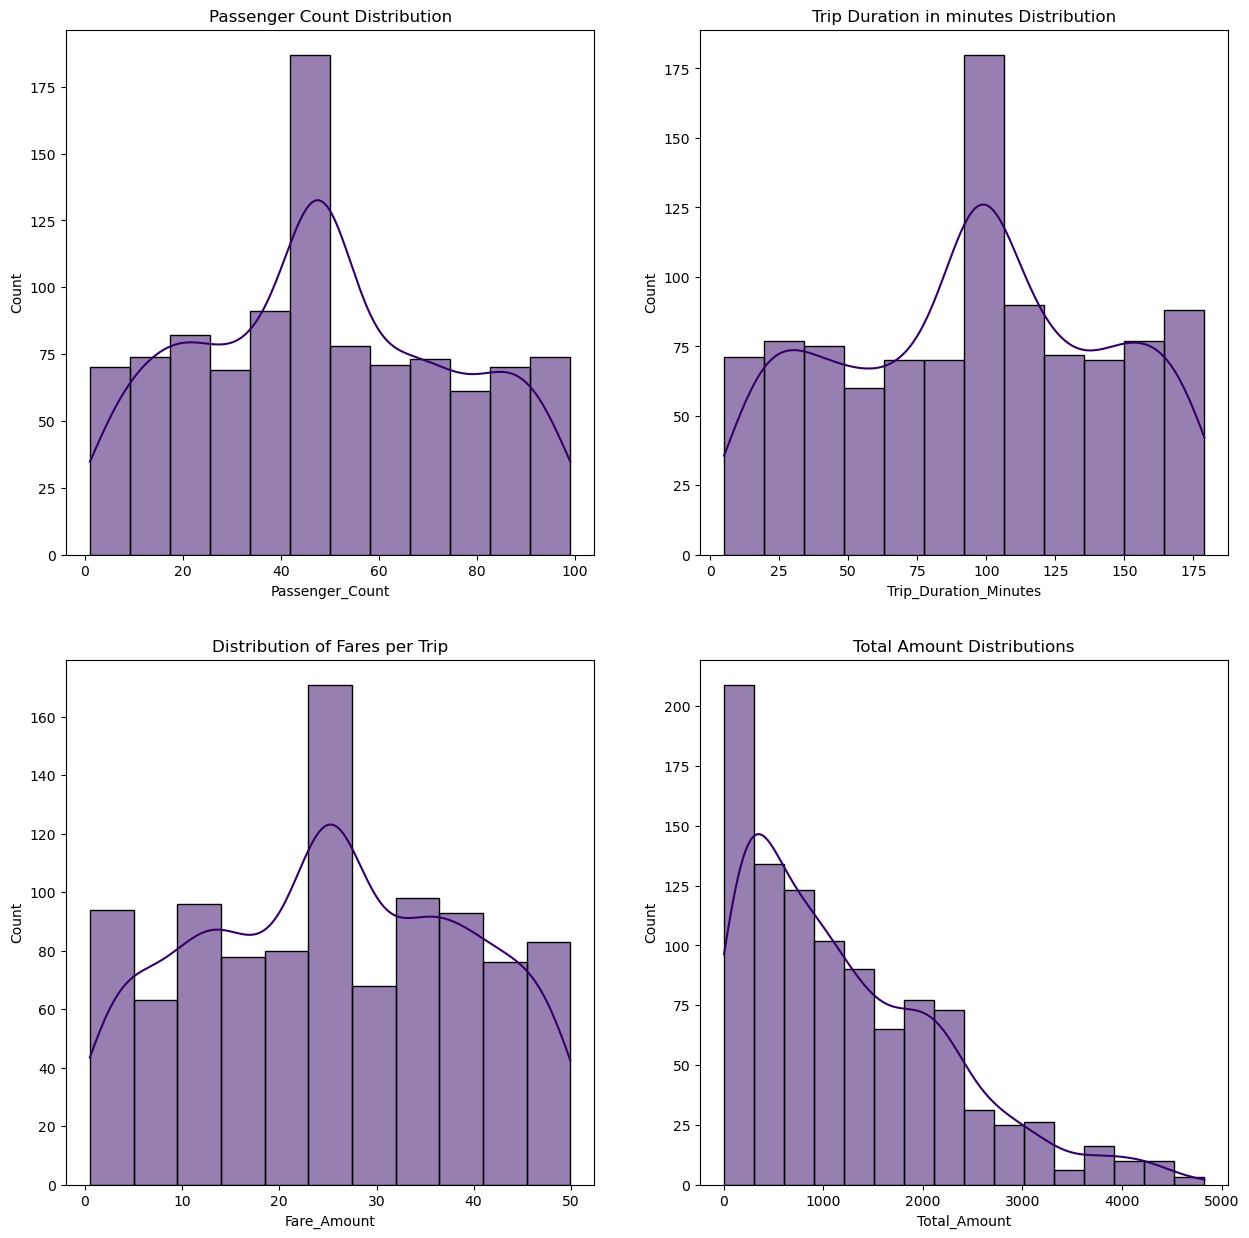

In [105]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax = ax.flatten()

sns.histplot(x=df["Passenger_Count"], ax=ax[0], kde=True, color="#330066")
ax[0].set_title("Passenger Count Distribution")

sns.histplot(x=df["Trip_Duration_Minutes"], ax=ax[1], kde=True, color="#330066")
ax[1].set_title("Trip Duration in minutes Distribution")

sns.histplot(x=df["Fare_Amount"], ax=ax[2], kde=True, color="#330066")
ax[2].set_title("Distribution of Fares per Trip")

sns.histplot(x=df["Total_Amount"], ax=ax[3], kde=True, color="#330066")
ax[3].set_title("Total Amount Distributions");


### Insights
1. **Passenger Count Distribution** (top-left, ax[0]):
   - A histogram showing the frequency distribution of the number of passengers per trip
   - Includes a KDE (Kernel Density Estimate) curve in purple (#330066)
   - Shows how many passengers typically ride in each taxi trip
     

2. **Trip Duration in Minutes Distribution** (top-right, ax[1]):
   - A histogram showing how trip durations are distributed
   - Includes a KDE curve in the same purple color
   - Reveals patterns like typical trip lengths and whether there are many short trips or longer journeys
     

3. **Distribution of Fares per Trip** (bottom-left, ax[2]):
   - A histogram showing the frequency of different fare amounts
   - Includes a KDE curve in purple
   - Shows the typical fare ranges and any potential fare clusters
     

4. **Total Amount Distributions** (bottom-right, ax[3]):
   - A histogram showing the distribution of total amounts paid (likely including fare plus tips, taxes, etc.)
   - Includes a KDE curve in purple
   - Reveals the overall payment patterns



Insights

All four distributions show patterns which is typical for a transportation data.
Total Amount is Right-Skewed
The rest are normal distributions
Highest passenger count is around 45 to 50
Highest trip duration is arpunt 100
Modal fare Amount is 25.

#### Bivariate Analysis

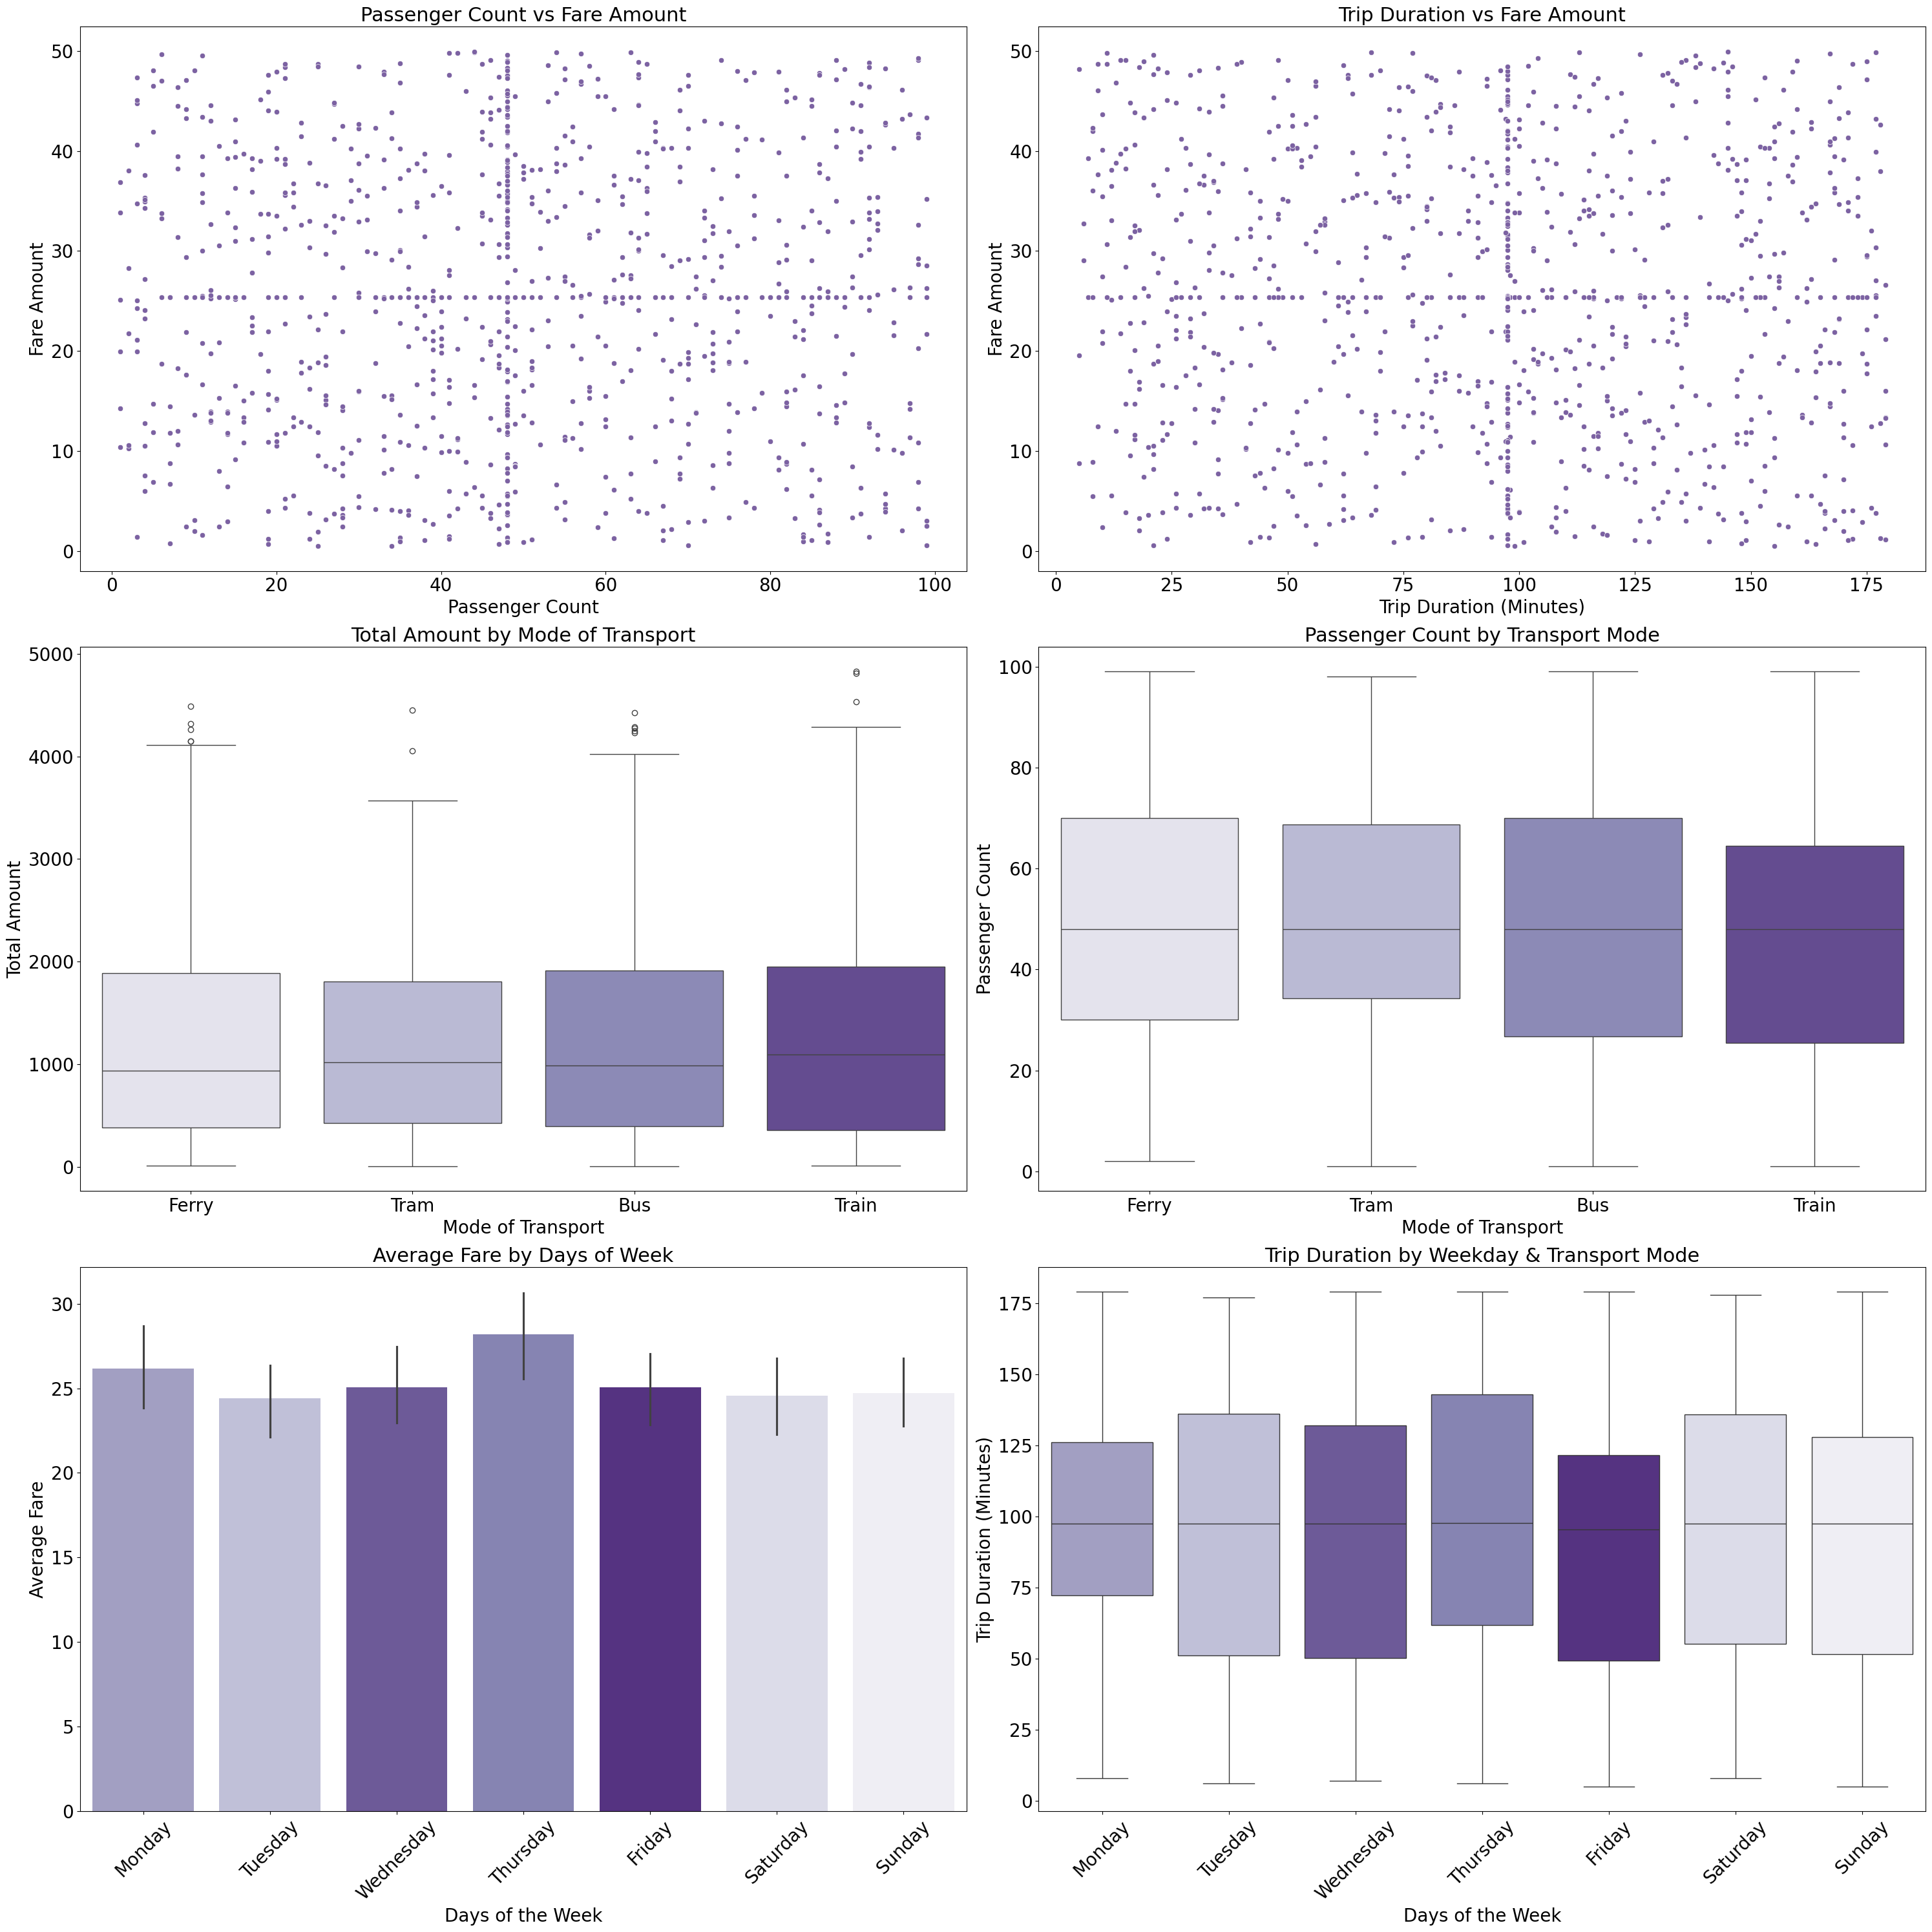

In [106]:
# Set up a 3x2 grid
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))
ax = ax.flatten()

# 1. Passenger Count vs Fare Amount
sns.scatterplot(data=df, x='Passenger_Count', y='Fare_Amount', color="#7c62a2", ax=ax[0])
ax[0].set_title("Passenger Count vs Fare Amount", fontsize=22)
ax[0].set_xlabel("Passenger Count", fontsize=20)
ax[0].set_ylabel("Fare Amount", fontsize=20)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)

# 2. Trip Duration vs Fare Amount
sns.scatterplot(data=df, x='Trip_Duration_Minutes', y='Fare_Amount', color="#7c62a2", ax=ax[1])
ax[1].set_title("Trip Duration vs Fare Amount", fontsize=22)
ax[1].set_xlabel("Trip Duration (Minutes)", fontsize=20)
ax[1].set_ylabel("Fare Amount", fontsize=20)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)

# 3. Total Amount vs Mode of Transport
sns.boxplot(data=df, x='Mode_of_Transport', y='Total_Amount', hue='Mode_of_Transport', palette="Purples", ax=ax[2])
ax[2].set_title("Total Amount by Mode of Transport", fontsize=22)
ax[2].set_xlabel("Mode of Transport", fontsize=20)
ax[2].set_ylabel("Total Amount", fontsize=20)
ax[2].tick_params(axis='x', labelsize=20)
ax[2].tick_params(axis='y', labelsize=20)

# 4. Mode of Transport vs Passenger Count
sns.boxplot(data=df, x='Mode_of_Transport', y='Passenger_Count', hue='Mode_of_Transport', 
            palette='Purples', ax=ax[3])
ax[3].set_title("Passenger Count by Transport Mode", fontsize=22)
ax[3].set_xlabel("Mode of Transport", fontsize=20)
ax[3].set_ylabel("Passenger Count", fontsize=20)
ax[3].tick_params(axis='x', labelsize=20)
ax[3].tick_params(axis='y', labelsize=20)

# 5. Day of Week vs Average Fare
sns.barplot(data=df, x='Day_of_Week', y='Fare_Amount', estimator='mean',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    hue='Day_of_Week', palette='Purples', ax=ax[4])
ax[4].set_title("Average Fare by Days of Week", fontsize=22)
ax[4].set_xlabel("Days of the Week", fontsize=20)
ax[4].set_ylabel("Average Fare", fontsize=20)
ax[4].tick_params(axis='x', rotation=45)
ax[4].tick_params(axis='x', labelsize=20)
ax[4].tick_params(axis='y', labelsize=20)


# 6. Trip Duration by Day of Week and Transport Mode
sns.boxplot(data=df, x='Day_of_Week', y='Trip_Duration_Minutes', hue='Day_of_Week',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='Purples', ax=ax[5])
ax[5].set_title("Trip Duration by Weekday & Transport Mode", fontsize=22)
ax[5].set_xlabel("Days of the Week", fontsize=20)
ax[5].set_ylabel("Trip Duration (Minutes)", fontsize=20)
ax[5].tick_params(axis='x', rotation=45, labelsize=20)
ax[5].tick_params(axis='y', labelsize=20)

# Final layout
plt.tight_layout()
plt.show()


#### Insights about why I used the charts
Appropriate Chart Type: You appear to be using a scatter plot or regression plot to show the relationship between trip duration and fare amount, which is appropriate for examining correlations between continuous variables.

#### Trip Duration vs Fare Amount

This visualization shows the relationship between trip duration (in minutes) and fare amount. From the chart:

- There appears to be a positive correlation between trip duration and fare amount, suggesting that longer trips generally cost more.
- The chart is positioned as the second subplot in a larger dashboard that examines various aspects of transportation data.
- The clear labeling with "Trip Duration (Minutes)" on the x-axis and "Fare Amount" on the y-axis helps viewers quickly understand what's being displayed.

This visualization is particularly useful for:
- Understanding pricing structures for different transportation services
- Identifying any outliers where the fare-to-duration ratio differs significantly from the norm
- Comparing fare efficiency across different trip lengths


More Insights
1. Fare Amount Is Not Strongly Influenced by Passenger Count or Trip Duration
The top two scatter plots ("Passenger Count vs Fare Amount" and "Trip Duration vs Fare Amount") show widely dispersed dots with no clear trend, suggesting no strong correlation.

This implies that fare pricing may not be directly linked to the number of passengers or duration — possibly due to flat-rate pricing or other factors like zones or peak hours.

2. Trains and Buses Generate Higher Total Revenue but Show Similar Passenger Counts
In the "Total Amount by Mode of Transport" box plot, Trains and Buses have the highest fare revenue, but the "Passenger Count by Transport Mode" plot shows no significant difference in passenger counts across transport types.

This suggests that train and bus fares might be higher per trip or cover longer, more expensive routes.

3. Thursday Has the Highest Average Fare and Longest Trip Durations
From the “Average Fare by Days of Week” and “Trip Duration by Weekday & Transport Mode” plots:

Thursday consistently shows the highest average fare and longer trip durations across transport modes.

This could indicate increased demand, longer trips, or higher pricing strategies on Thursdays, potentially linked to commuter behavior or service scheduling.

Heatmap showing the correlation of Numerical variables

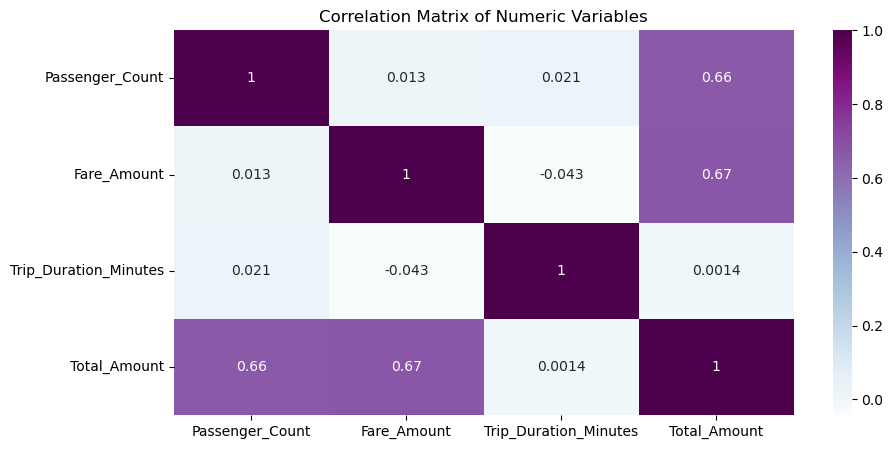

In [107]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Passenger_Count', 'Fare_Amount', 'Trip_Duration_Minutes', 'Total_Amount']].corr(), annot=True, cmap='BuPu')
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

Passenger Count & Total Amount → 0.66-Strong positive correlation
	
2. Fare Amount & Total Amount → 0.67-Strong positive correlation
	
3. Passenger Count & Fare Amount → 0.013•-Very weak correlation•
	
4. Trip Duration Minutes & Fare Amount → -0.043- Slight negative correlation•	

.5. Trip Duration Minutes & Total Amount → 0.0014- No correlation

In [108]:
df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Total_Amount
0,TRIP0001,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,91.216483
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,950.975482


Heatmap showing the correlation of Categorical variables

In [109]:
from sklearn.preprocessing import OneHotEncoder

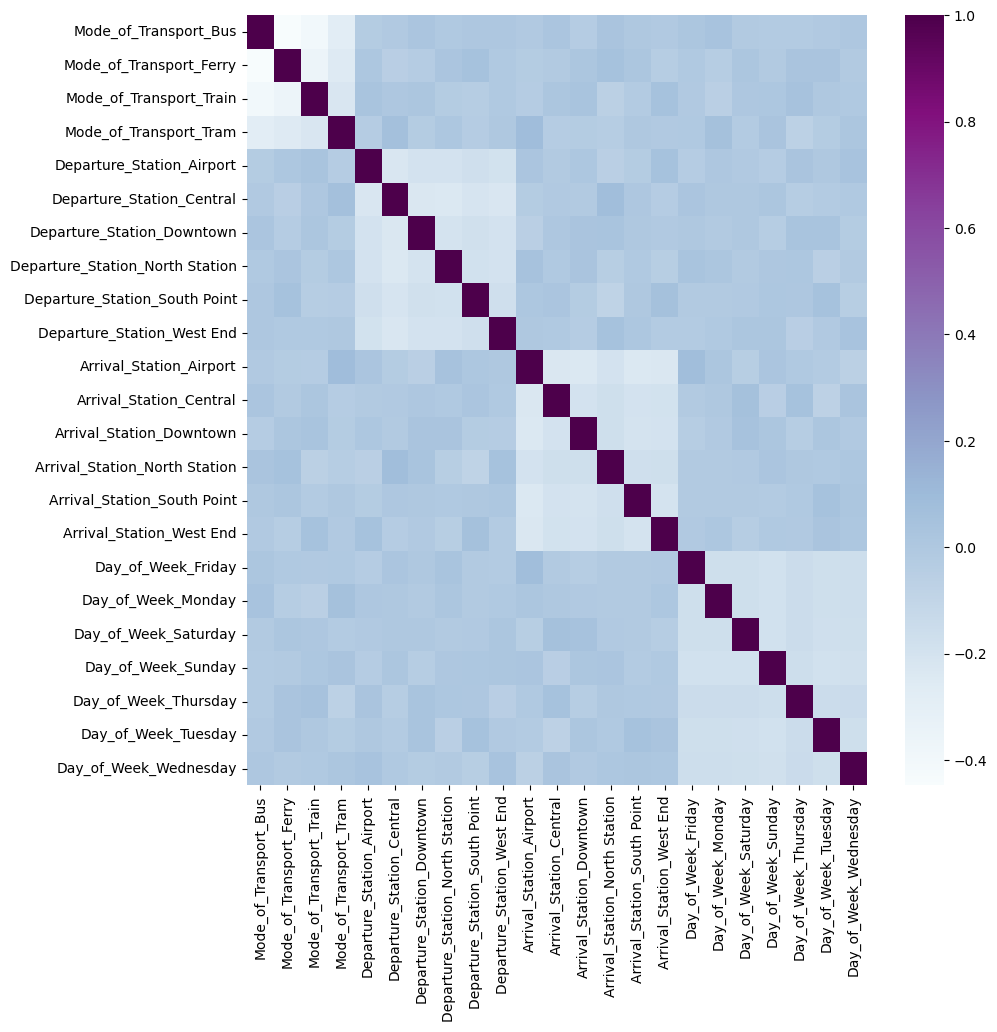

In [110]:
categorical_cols = ['Mode_of_Transport', 'Departure_Station', 'Arrival_Station', 'Day_of_Week']
df_encoded = pd.get_dummies(df[categorical_cols])

# Now create the correlation matrix with the encoded variables
plt.figure(figsize=(10, 10))  # Larger figure size as there will be more variables after encoding
sns.heatmap(df_encoded.corr(), annot=False, cmap='BuPu')  # annot=False because there might be too many variables
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.yticks(rotation=0)

plt.show()

No strong relationship between categorical data

#### Time Series

In [111]:
# Ensure Trip_Date is datetime format
df["Trip_Date"] = pd.to_datetime(df["Trip_Date"])

# Extract components
df["Year"] = df["Trip_Date"].dt.year
df["Month"] = df["Trip_Date"].dt.month
df["Month_Name"] = df["Trip_Date"].dt.month_name()
df["Quarter"] = df["Trip_Date"].dt.quarter


In [112]:
df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Total_Amount,Year,Month,Month_Name,Quarter
0,TRIP0001,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,91.216483,2024,1,January,1
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,950.975482,2024,1,January,1


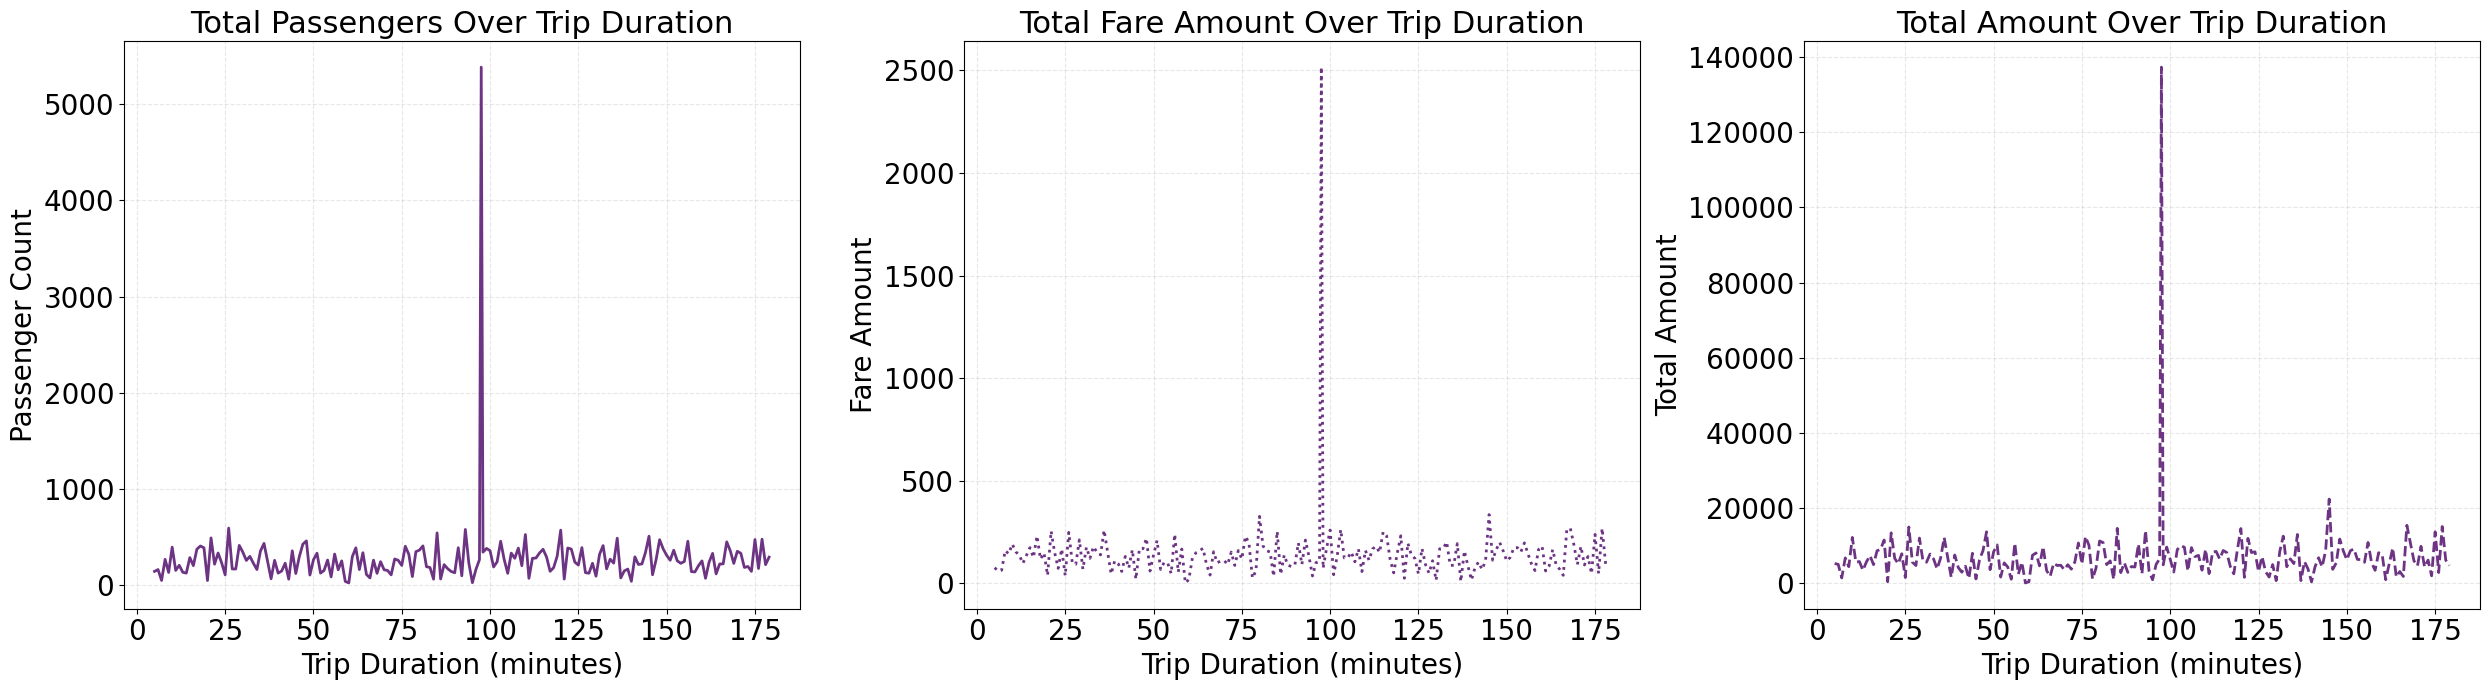

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
ax = ax.flatten()

# 1. Total Passengers over Trip Duration
passenger_by_duration = df.groupby("Trip_Duration_Minutes")["Passenger_Count"].sum()
ax[0].plot(passenger_by_duration.index, passenger_by_duration.values, color="#6C3483", linewidth=2)
ax[0].set_title("Total Passengers Over Trip Duration", fontsize=22)
ax[0].set_xlabel("Trip Duration (minutes)", fontsize=20)
ax[0].set_ylabel("Passenger Count", fontsize=20)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].grid(True, linestyle="--", alpha=0.3)

# 2. Total Fare Amount over Trip Duration
fare_by_duration = df.groupby("Trip_Duration_Minutes")["Fare_Amount"].sum()
ax[1].plot(fare_by_duration.index, fare_by_duration.values, color="#6C3483", linewidth=2, linestyle="dotted")
ax[1].set_title("Total Fare Amount Over Trip Duration", fontsize=22)
ax[1].set_xlabel("Trip Duration (minutes)", fontsize=20)
ax[1].set_ylabel("Fare Amount", fontsize=20)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].grid(True, linestyle="--", alpha=0.3)

# 3. Total Amount over Trip Duration
total_by_duration = df.groupby("Trip_Duration_Minutes")["Total_Amount"].sum()
ax[2].plot(total_by_duration.index, total_by_duration.values, color="#6C3483", linewidth=2, linestyle="--")
ax[2].set_title("Total Amount Over Trip Duration", fontsize=22)
ax[2].set_xlabel("Trip Duration (minutes)", fontsize=20)
ax[2].set_ylabel("Total Amount", fontsize=20)
ax[2].tick_params(axis='x', labelsize=20)
ax[2].tick_params(axis='y', labelsize=20)
ax[2].grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

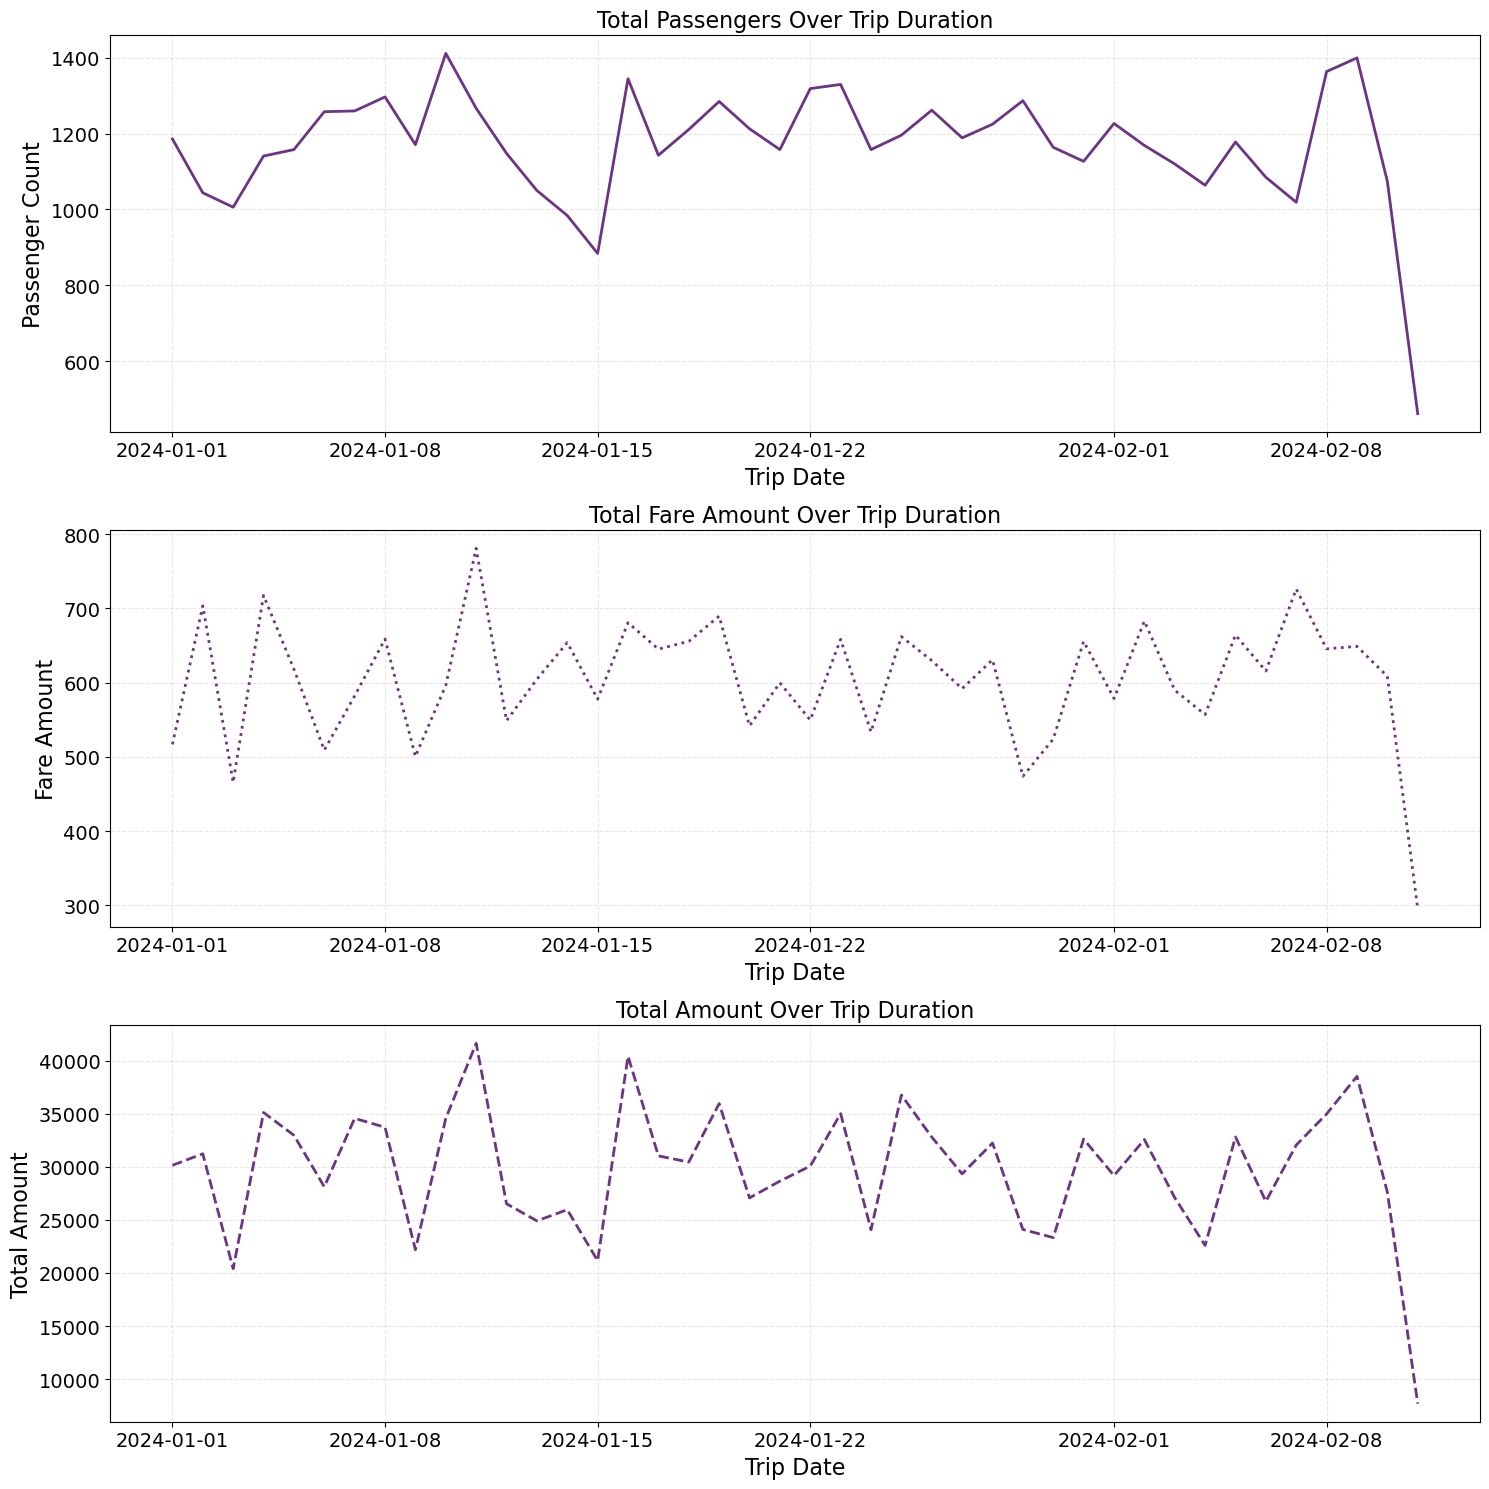

In [114]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
ax = ax.flatten()

# 1. Total Passengers over Trip Duration
passenger_by_duration = df.groupby("Trip_Date")["Passenger_Count"].sum()
ax[0].plot(passenger_by_duration.index, passenger_by_duration.values, color="#6C3483", linewidth=2)
ax[0].set_title("Total Passengers Over Trip Duration", fontsize=16)
ax[0].set_xlabel("Trip Date", fontsize=16)
ax[0].set_ylabel("Passenger Count", fontsize=16)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].grid(True, linestyle="--", alpha=0.3)

# 2. Total Fare Amount over Trip Duration
fare_by_duration = df.groupby("Trip_Date")["Fare_Amount"].sum()
ax[1].plot(fare_by_duration.index, fare_by_duration.values, color="#6C3483", linewidth=2, linestyle="dotted")
ax[1].set_title("Total Fare Amount Over Trip Duration", fontsize=16)
ax[1].set_xlabel("Trip Date", fontsize=16)
ax[1].set_ylabel("Fare Amount", fontsize=16)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].grid(True, linestyle="--", alpha=0.3)

# 3. Total Amount over Trip Duration
total_by_duration = df.groupby("Trip_Date")["Total_Amount"].sum()
ax[2].plot(total_by_duration.index, total_by_duration.values, color="#6C3483", linewidth=2, linestyle="--")
ax[2].set_title("Total Amount Over Trip Duration", fontsize=16)
ax[2].set_xlabel("Trip Date", fontsize=16)
ax[2].set_ylabel("Total Amount", fontsize=16)
ax[2].tick_params(axis='x', labelsize=14)
ax[2].tick_params(axis='y', labelsize=14)
ax[2].grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

Shows a similar trend between Trip Date vs Total Amount, Passenger count and Fare amount 

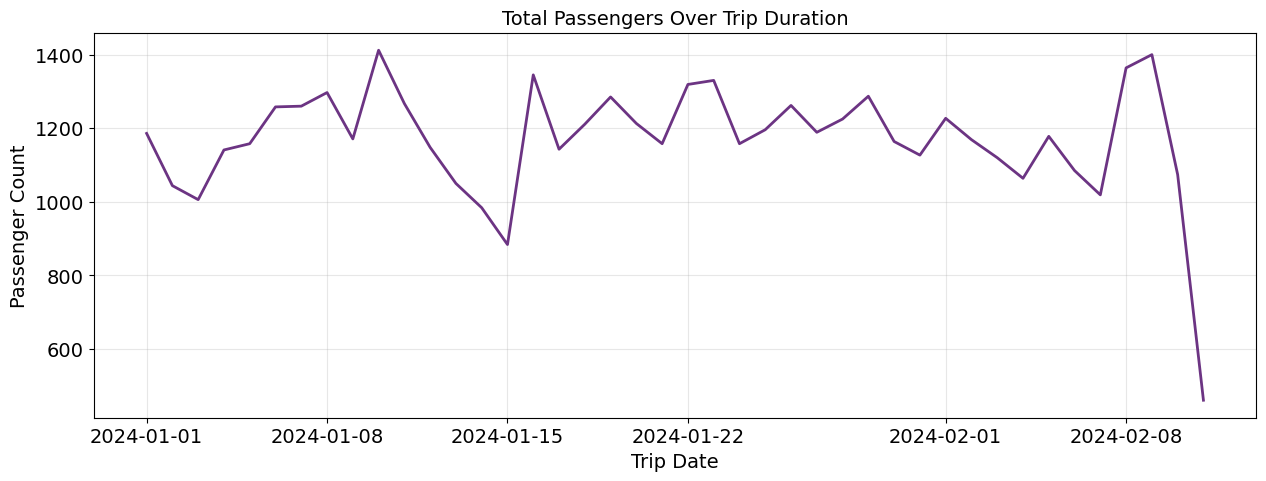

In [115]:
# Total Passengers over Trip Duration
plt.figure(figsize=(15,5))
passenger_by_duration = df.groupby("Trip_Date")["Passenger_Count"].sum()
plt.plot(passenger_by_duration.index, passenger_by_duration.values, color="#6C3483", linewidth=2)
plt.title("Total Passengers Over Trip Duration", fontsize=14)
plt.xlabel("Trip Date", fontsize=14)
plt.ylabel("Passenger Count", fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(True, alpha=0.3)

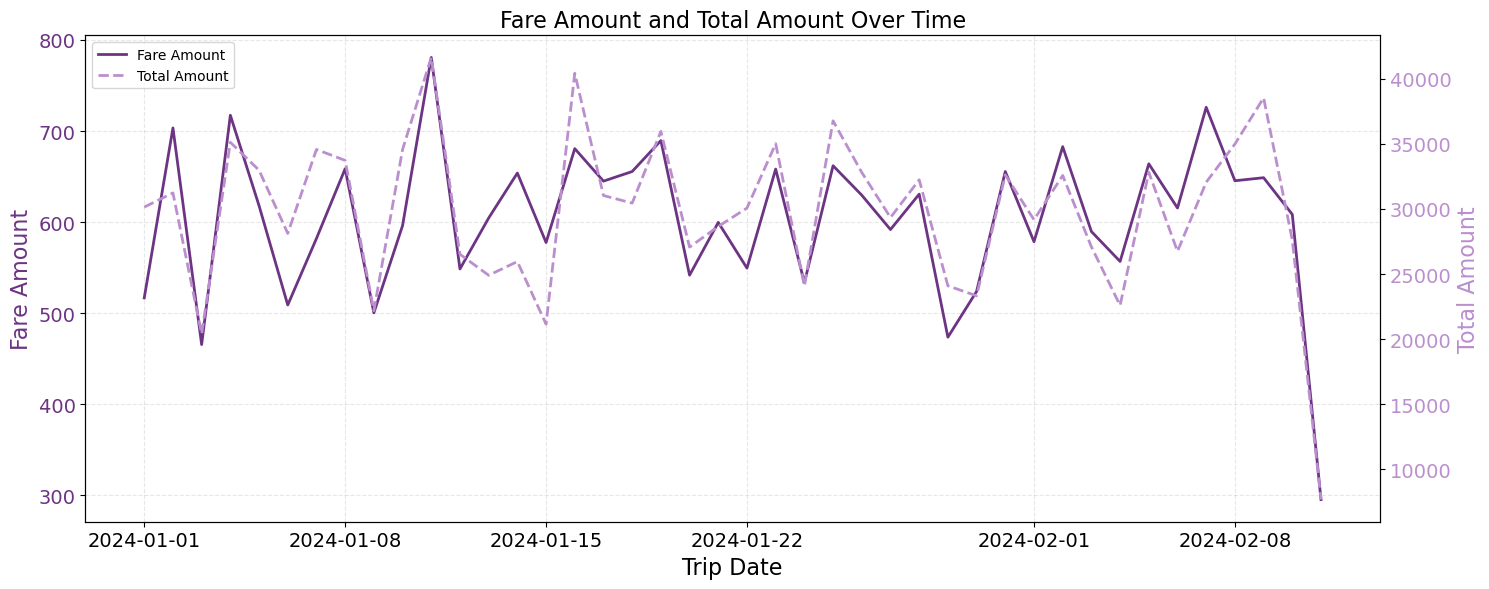

In [116]:
# Group data
fare_by_date = df.groupby("Trip_Date")["Fare_Amount"].sum()
total_by_date = df.groupby("Trip_Date")["Total_Amount"].sum()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# First line (Fare Amount)
line1, = ax1.plot(fare_by_date.index, fare_by_date.values, color="#6C3483", linewidth=2, label="Fare Amount")
ax1.set_xlabel("Trip Date", fontsize=16)
ax1.set_ylabel("Fare Amount", color="#6C3483", fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelcolor="#6C3483", labelsize=14)
ax1.grid(True, linestyle="--", alpha=0.3)

# Second y-axis (Total Amount)
ax2 = ax1.twinx()
line2, = ax2.plot(total_by_date.index, total_by_date.values, color="#BB8FCE", linestyle="--", linewidth=2, label="Total Amount")
ax2.set_ylabel("Total Amount", color="#BB8FCE", fontsize=16)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelcolor="#BB8FCE", labelsize=14)

# Add combined legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

# Title and layout
plt.title("Fare Amount and Total Amount Over Time", fontsize=16)
fig.tight_layout()
plt.show()


#### Multivariate Analysis

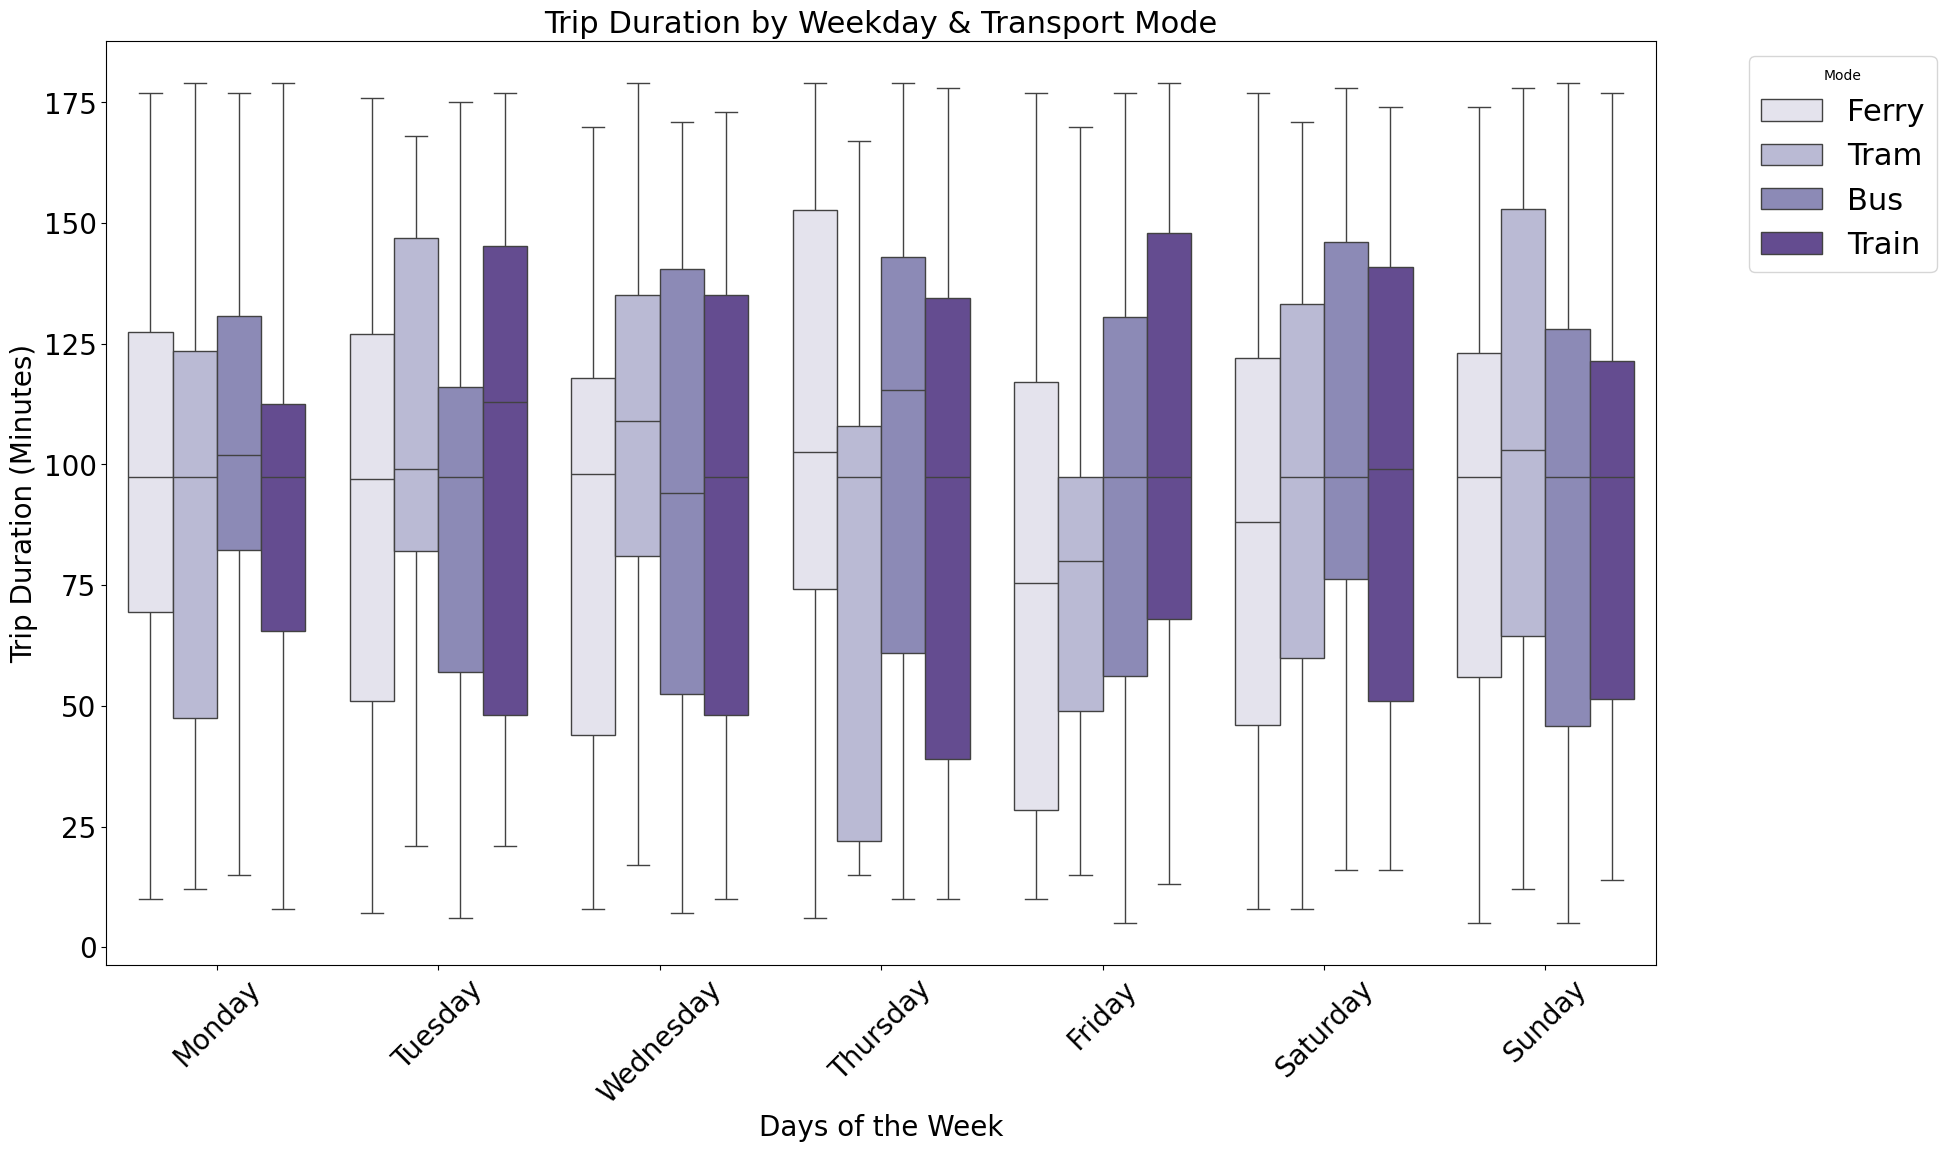

In [117]:
# Trip Duration by Day of Week and Transport Mode
plt.figure(figsize=(20,12))
sns.boxplot(data=df, x='Day_of_Week', y='Trip_Duration_Minutes',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='Mode_of_Transport',
    palette='Purples')
plt.title("Trip Duration by Weekday & Transport Mode", fontsize=22)
plt.xlabel("Days of the Week", fontsize=20)
plt.ylabel("Trip Duration (Minutes)", fontsize=20)
plt.tick_params(axis='x', rotation=45, labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(title="Mode", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=22);


1. Trains have the highest and most variable trip durations across all days. The train data (dark purple) consistently shows the longest median trip times and the widest distribution ranges, with many outliers extending well beyond other transport modes. This suggests train trips involve longer distances or more complex routing compared to other options.
2. Ferry trips show the most consistent duration patterns throughout the week. The ferry data (light gray) maintains relatively stable median times and distributions across all seven days, indicating this transport mode has more predictable scheduling and routing that doesn't vary significantly based on the day of the week.
3. Weekend patterns differ notably from weekdays, particularly for buses and trams. Saturday and Sunday show some compression in the ranges for buses (medium blue) and trams (light blue), suggesting different usage patterns on weekends - possibly fewer peak-hour congestion effects or different route selections when people have more flexible travel schedules.RetryClaude can make mistakes. Please double-check responses.

comparing months by fare amount

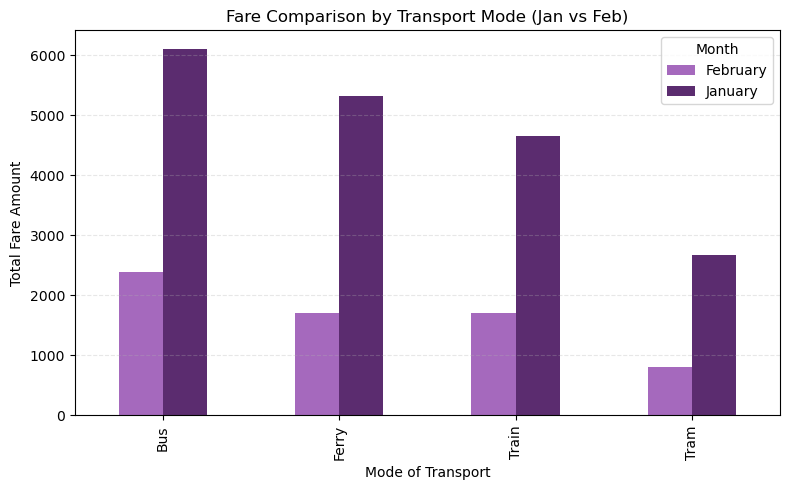

In [118]:
# comparing january and february fare by transport mode
# Filter for January and February only
jan_feb_data = df[df["Month_Name"].isin(["January", "February"])]

# Group by Month and Mode of Transport, then sum Fare_Amount
fare_comparison = jan_feb_data.groupby(["Month_Name", "Mode_of_Transport"])["Fare_Amount"].sum().reset_index()

# Pivot the data for plotting
fare_pivot = fare_comparison.pivot(index="Mode_of_Transport", columns="Month_Name", values="Fare_Amount").fillna(0)

# Plot
fare_pivot.plot(kind="bar", figsize=(8, 5), color=["#A569BD", "#5B2C6F"])
plt.title("Fare Comparison by Transport Mode (Jan vs Feb)")
plt.xlabel("Mode of Transport")
plt.ylabel("Total Fare Amount")
plt.legend(title="Month")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


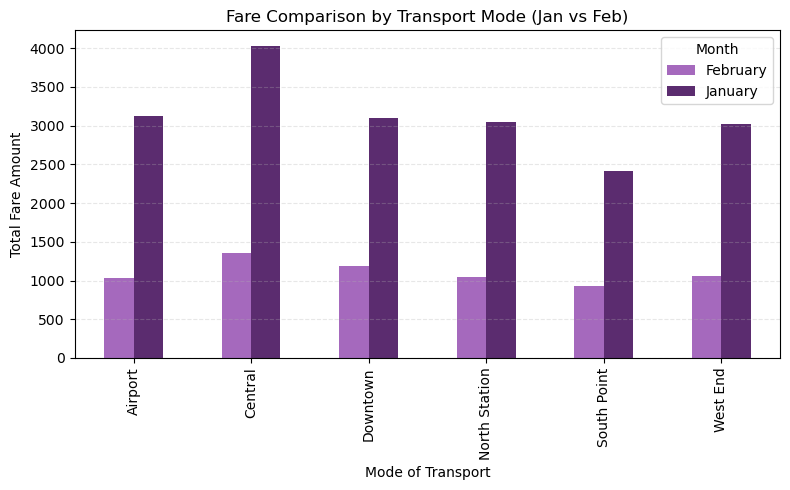

In [119]:
# comparing january and february fare by Departure Station
# Filter for January and February only
jan_feb_data = df[df["Month_Name"].isin(["January", "February"])]

# Group by Month and Mode of Transport, then sum Fare_Amount
fare_comparison = jan_feb_data.groupby(["Month_Name", "Departure_Station"])["Fare_Amount"].sum().reset_index()

# Pivot the data for plotting
fare_pivot = fare_comparison.pivot(index="Departure_Station", columns="Month_Name", values="Fare_Amount").fillna(0)

# Plot
fare_pivot.plot(kind="bar", figsize=(8, 5), color=["#A569BD", "#5B2C6F"])
plt.title("Fare Comparison by Transport Mode (Jan vs Feb)")
plt.xlabel("Mode of Transport")
plt.ylabel("Total Fare Amount")
plt.legend(title="Month")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


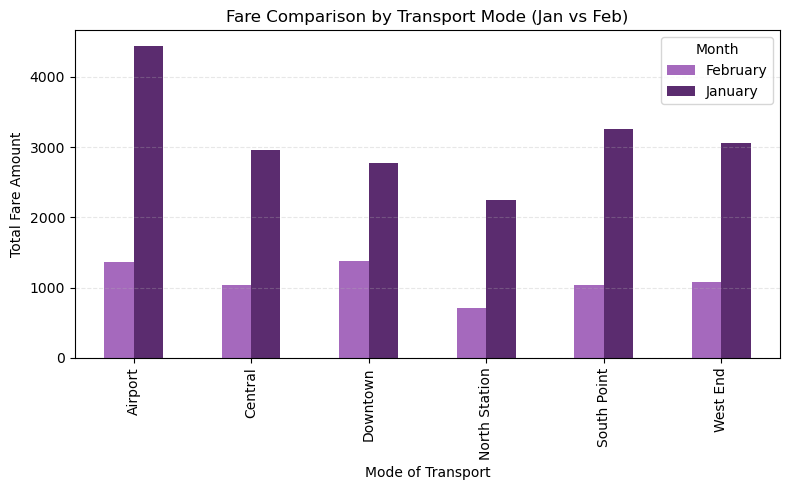

In [120]:
# comparing january and february fare by Arrival Station
# Filter for January and February only
jan_feb_data = df[df["Month_Name"].isin(["January", "February"])]

# Group by Month and Mode of Transport, then sum Fare_Amount
fare_comparison = jan_feb_data.groupby(["Month_Name", "Arrival_Station"])["Fare_Amount"].sum().reset_index()

# Pivot the data for plotting
fare_pivot = fare_comparison.pivot(index="Arrival_Station", columns="Month_Name", values="Fare_Amount").fillna(0)

# Plot
fare_pivot.plot(kind="bar", figsize=(8, 5), color=["#A569BD", "#5B2C6F"])
plt.title("Fare Comparison by Transport Mode (Jan vs Feb)")
plt.xlabel("Mode of Transport")
plt.ylabel("Total Fare Amount")
plt.legend(title="Month")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### Bringing subplots to multi variate analysis

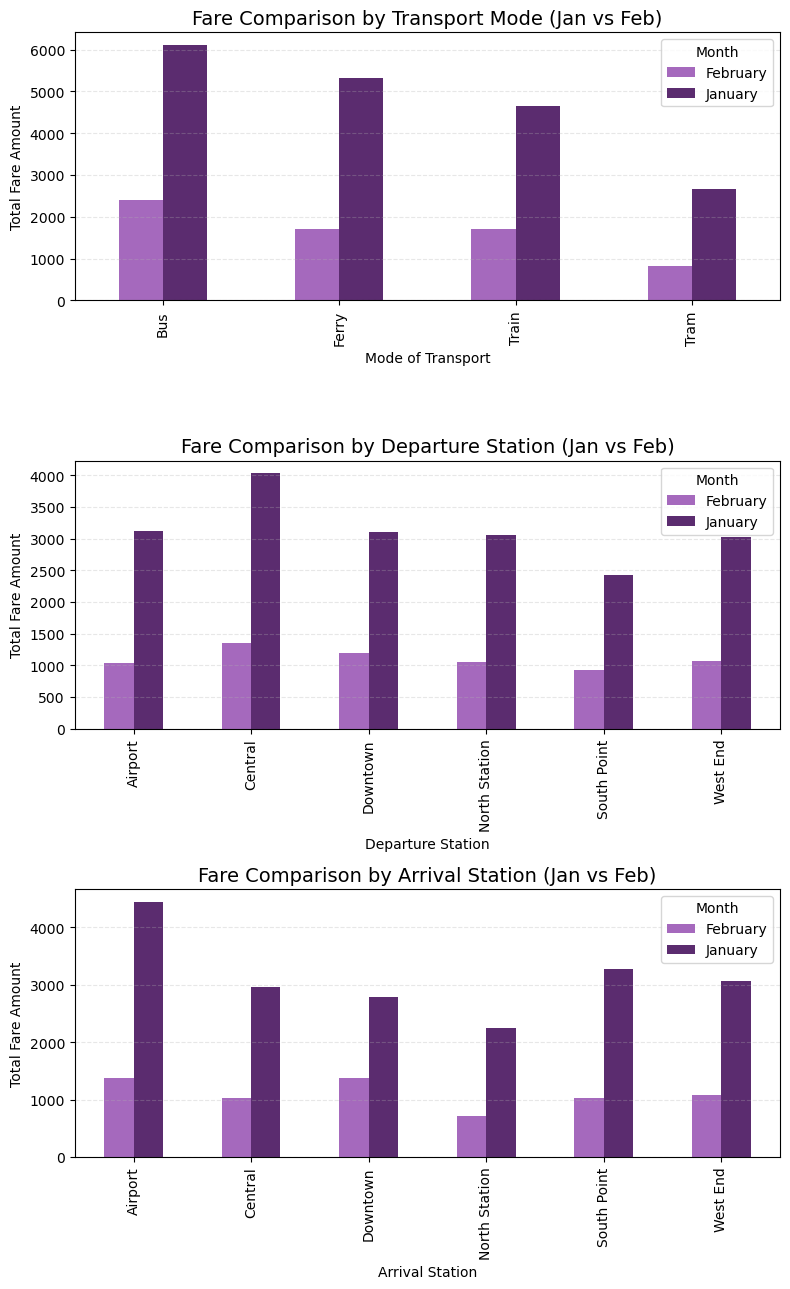

In [121]:
# Filter for January and February
jan_feb_data = df[df["Month_Name"].isin(["January", "February"])]

# Setup figure and axes
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 13))
titles = ["Fare Comparison by Transport Mode", "Fare Comparison by Departure Station", "Fare Comparison by Arrival Station"]
group_cols = ["Mode_of_Transport", "Departure_Station", "Arrival_Station"]

# Loop to plot each subplot
for i in range(3):
    # Group and pivot
    fare_comparison = jan_feb_data.groupby(["Month_Name", group_cols[i]])["Fare_Amount"].sum().reset_index()
    fare_pivot = fare_comparison.pivot(index=group_cols[i], columns="Month_Name", values="Fare_Amount").fillna(0)

    # Plot
    fare_pivot.plot(kind="bar", ax=ax[i], color=["#A569BD", "#5B2C6F"])
    ax[i].set_title(f"{titles[i]} (Jan vs Feb)", fontsize=14)
    ax[i].set_xlabel(group_cols[i].replace("_", " "))
    ax[i].set_ylabel("Total Fare Amount")
    ax[i].legend(title="Month")
    ax[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Insights:
1. January fares are consistently higher than February across all transport modes and stations. Every single comparison shows dark purple (January) bars exceeding light purple (February) bars, indicating a clear seasonal pricing pattern with January being the more expensive month.
2. Bus travel generates the highest total fare revenue, particularly in January. The bus mode shows the largest absolute fare amounts, with January bus fares reaching over 6000 units - significantly higher than ferries, trains, or trams during the same period.
3. Airport stations show the most dramatic month-to-month fare differences. In both departure and arrival station charts, Airport exhibits the largest gap between January and February fares, suggesting this location has the most pronounced seasonal pricing variations compared to other stations.

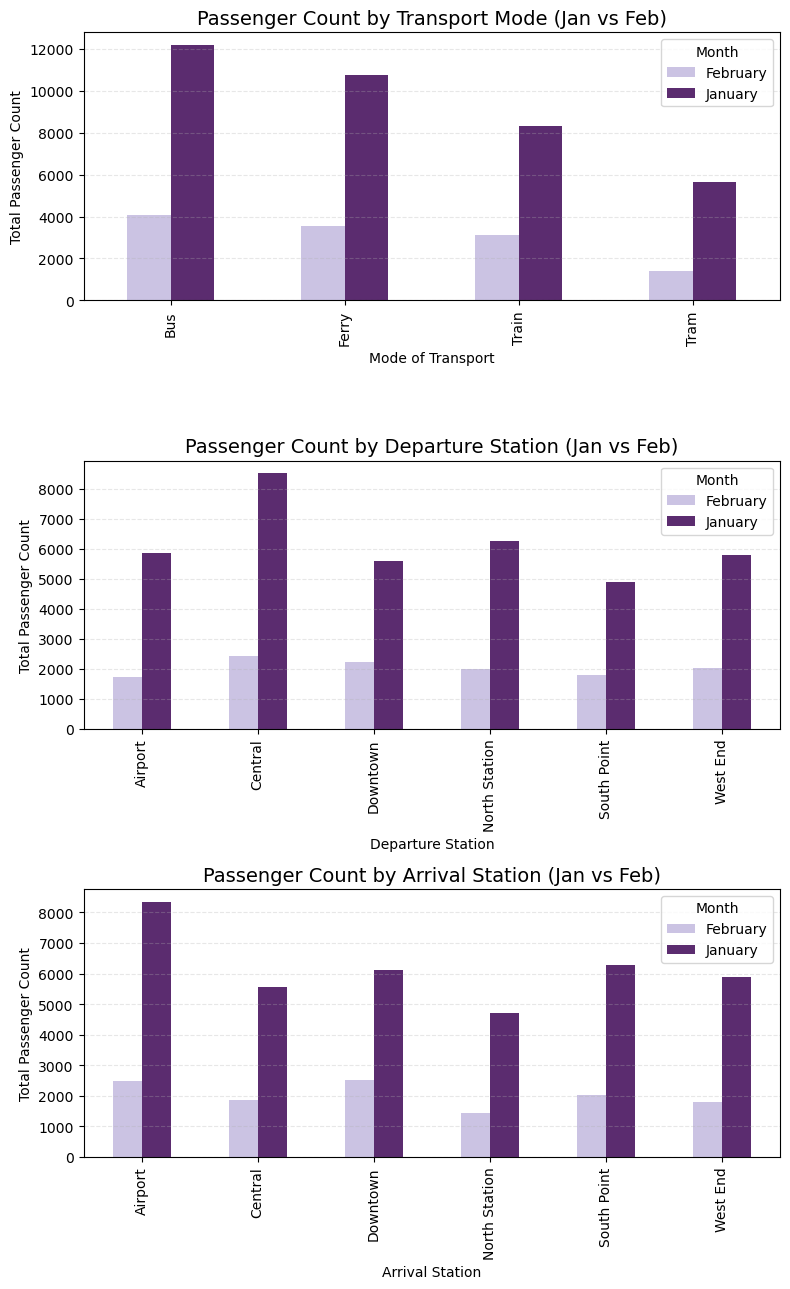

In [122]:
# Filter for January and February
jan_feb_data = df[df["Month_Name"].isin(["January", "February"])]

# Setup figure and axes
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 13))
titles = ["Passenger Count by Transport Mode", "Passenger Count by Departure Station", "Passenger Count by Arrival Station"]
group_cols = ["Mode_of_Transport", "Departure_Station", "Arrival_Station"]

# Loop to plot each subplot
for i in range(3):
    # Group and pivot
    fare_comparison = jan_feb_data.groupby(["Month_Name", group_cols[i]])["Passenger_Count"].sum().reset_index()
    fare_pivot = fare_comparison.pivot(index=group_cols[i], columns="Month_Name", values="Passenger_Count").fillna(0)

    # Plot
    fare_pivot.plot(kind="bar", ax=ax[i], color=["#CBC3E3", "#5B2C6F"])
    ax[i].set_title(f"{titles[i]} (Jan vs Feb)", fontsize=14)
    ax[i].set_xlabel(group_cols[i].replace("_", " "))
    ax[i].set_ylabel("Total Passenger Count")
    ax[i].legend(title="Month")
    ax[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Insights:
1. January consistently shows much higher passenger volumes than February across all transport modes and stations. The dark purple bars (January) are dramatically taller than light purple bars (February) in every comparison, indicating a significant seasonal drop in ridership from January to February.
2. Bus transportation carries the highest passenger volumes, with over 12,000 passengers in January. Among all transport modes, buses demonstrate the greatest ridership numbers, followed by ferries and trains, while trams show the lowest passenger counts.
3. Central station serves as the busiest hub for both departures and arrivals. Central station shows the highest passenger counts in both departure and arrival charts, reaching over 8,000 passengers in January, making it the most heavily trafficked station in the network.